## Introduction to Regularization
Regularization is a technique used to prevent overfitting by adding a penalty to the loss function. In machine learning, the goal is to build a model that generalizes well to new data. However, models can sometimes learn the noise in the training data, resulting in poor generalization to unseen data. This phenomenon is called overfitting.



## What is Overfitting?
Overfitting occurs when a model learns not only the true patterns in the data but also the noise or random fluctuations. This leads to high accuracy on training data but poor performance on test data.
- **Symptoms of overfitting**: high variance, low bias.
- **Solution**: Regularization techniques help address overfitting by limiting model complexity.

**Example:** Let's train a model on simple data and visualize overfitting.



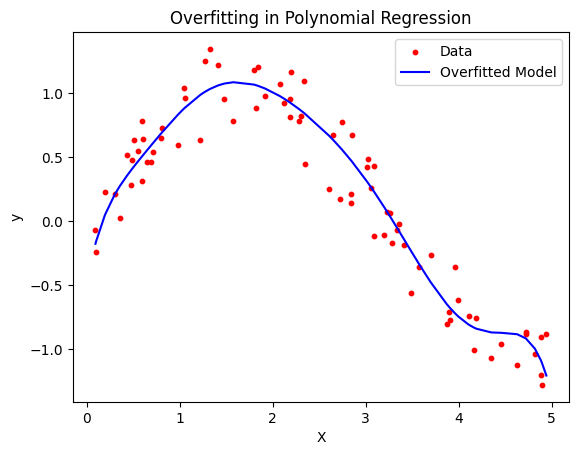

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Generating data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a polynomial regression model
poly = PolynomialFeatures(degree=9)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
lin_reg = LinearRegression().fit(X_poly_train, y_train)

# Plot
plt.scatter(X, y, color='red', s=10, label="Data")
plt.plot(X, lin_reg.predict(poly.transform(X)), label="Overfitted Model", color="blue")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Overfitting in Polynomial Regression")
plt.legend()
plt.show()


## The Loss Function
In supervised learning, the loss function measures the error between predicted and actual values. Common loss functions include Mean Squared Error (MSE) and Cross-Entropy Loss. The general form of a loss function with regularization is:

$$L = \text{Loss} + \text{Regularization Term}$$

The regularization term is added to control the model's complexity.

## L1 or Lasso Regularization
L1 Regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator), adds the absolute values of the coefficients to the loss function. The objective function for Lasso is:

$$L = \sum (y - \hat{y})^2 + \lambda \sum |w|$$

Lasso can shrink some coefficients to zero, effectively performing feature selection.

**Example:** Using Lasso Regression on sample data.



In [2]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Training Lasso Regression
lasso = Lasso(alpha=0.1)  # alpha is the regularization parameter
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Mean Squared Error: {mse_lasso:.2f}")


Lasso Mean Squared Error: 0.28


## L2 or Ridge Regularization
L2 Regularization, also known as Ridge Regularization, adds the squared values of the coefficients to the loss function. The objective function for Ridge is:

$$L = \sum (y - \hat{y})^2 + \lambda \sum w^2$$

Unlike Lasso, Ridge does not eliminate coefficients but shrinks them, which can improve model stability.

**Example:** Using Ridge Regression on sample data.



In [3]:
from sklearn.linear_model import Ridge

# Training Ridge Regression
ridge = Ridge(alpha=1.0)  # alpha is the regularization parameter
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Mean Squared Error: {mse_ridge:.2f}")


Ridge Mean Squared Error: 0.26


## Hyperparameter Tuning
Hyperparameters, such as \( \lambda \) in Lasso and Ridge, play a key role in model performance. Tuning these parameters helps find the best balance between underfitting and overfitting. Techniques for hyperparameter tuning include:
- **Grid Search**
- **Random Search**
- **Cross-Validation**

**Example:** Using Grid Search to find optimal alpha for Ridge.



In [4]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge_grid, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best alpha for Ridge: {grid_search.best_params_['alpha']}")


Best alpha for Ridge: 0.01


## The Bias-Variance Tradeoff
The bias-variance tradeoff is a key concept in machine learning:

- **Bias**: Error due to overly simplistic assumptions. High bias can lead to underfitting.
- **Variance**: Error due to sensitivity to fluctuations in the training set. High variance can lead to overfitting.

Regularization helps manage this tradeoff by adjusting the model's complexity to an optimal level.